In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection

In [2]:
df=pd.read_csv("churn_train.csv")

In [3]:
df["label"].replace({"True.":1,"False.":0},inplace=True)

In [4]:
df["label"].value_counts()

0    2850
1     483
Name: label, dtype: int64

In [5]:
df[:2]

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


# Encoding Discreet Values

In [6]:
label_encoder = preprocessing.LabelEncoder()

df["st"] = label_encoder.fit_transform(df["st"])
df["intplan"] = label_encoder.fit_transform(df["intplan"])
df["voice"] = label_encoder.fit_transform(df["voice"])

print (df.dtypes)

st              int32
acclen          int64
arcode          int64
phnum          object
intplan         int32
voice           int32
nummailmes      int64
tdmin         float64
tdcal           int64
tdchar        float64
temin         float64
tecal           int64
tecahr        float64
tnmin         float64
tncal           int64
tnchar        float64
timin         float64
tical           int64
tichar        float64
ncsc            int64
label           int64
dtype: object


In [7]:
df[:2]

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [8]:
X=df.drop({"phnum","label"}, axis=1)
y=df["label"]

In [9]:
catcols=list(X.select_dtypes(include="object").columns)
catcols.append("arcode")
catcols.append("intplan")
catcols.append("voice")
catcols

['arcode', 'intplan', 'voice']

In [10]:
xdfohe=pd.get_dummies(X,columns=catcols,drop_first=True)
xdfohe[ :2]

,st,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,arcode_415,arcode_510,intplan_1,voice_1
0,16,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,1,0,0,1
1,35,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,1,0,0,1


In [11]:
numcols=list(X.select_dtypes(exclude="object").columns)
numcols.remove("arcode")
numcols.remove("intplan")
numcols.remove("voice")
numcols  # Continuous columns

['st',
 'acclen',
 'nummailmes',
 'tdmin',
 'tdcal',
 'tdchar',
 'temin',
 'tecal',
 'tecahr',
 'tnmin',
 'tncal',
 'tnchar',
 'timin',
 'tical',
 'tichar',
 'ncsc']

In [12]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(xdfohe,y,test_size=.2,random_state=42)

In [13]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
Xtrain[numcols]=scaler.fit_transform(Xtrain[numcols])
Xtest[numcols]=scaler.transform(Xtest[numcols])

<ipython-input-13-03867141e4fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[numcols]=scaler.fit_transform(Xtrain[numcols])
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-13-03867141e4fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [14]:
Xtrain[ :2]

,st,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,arcode_415,arcode_510,intplan_1,voice_1
817,1.201937,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978,0,1,0,0
1373,0.933301,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519,1,0,0,0


In [15]:
def printscores(actual,pred):
    print("AUC:",metrics.roc_auc_score(actual,pred))
    print("accuracy:",metrics.accuracy_score(actual,pred))
    print("recall  :",metrics.recall_score(actual,pred))
    print("precision :",metrics.precision_score(actual,pred))
    print("f1-score : ",metrics.f1_score(actual,pred))

In [16]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)

LogisticRegression()

In [17]:
Xtrain[:2]

,st,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,arcode_415,arcode_510,intplan_1,voice_1
817,1.201937,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978,0,1,0,0
1373,0.933301,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519,1,0,0,0


In [18]:
trainpred=model.predict(Xtrain)
testpred=model.predict(Xtest)
printscores(ytrain,trainpred)
printscores(ytest,testpred)

AUC: 0.5869983312091398
accuracy: 0.86384096024006
recall  : 0.19895287958115182
precision : 0.5714285714285714
f1-score :  0.29514563106796116
AUC: 0.5735577091278031
accuracy: 0.856071964017991
recall  : 0.16831683168316833
precision : 0.5862068965517241
f1-score :  0.26153846153846155


In [19]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

# Splitting the data

In [20]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

# Creating Classifiers

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()

from sklearn.svm import SVC
svc_model = SVC(gamma='auto')

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

from sklearn.neighbors import KNeighborsClassifier
k_neighbors = KNeighborsClassifier()

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs')

# Printing the accuracy score of each model

In [22]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.95
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


# Checking the error of each model using confusion matrix

# Gradient Boosting

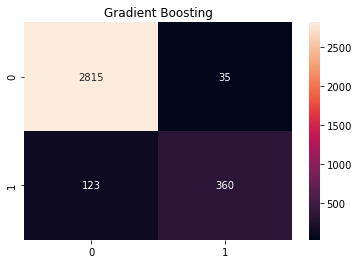

In [23]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

# SVM

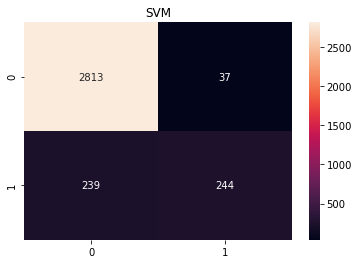

In [24]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

# Random Forest

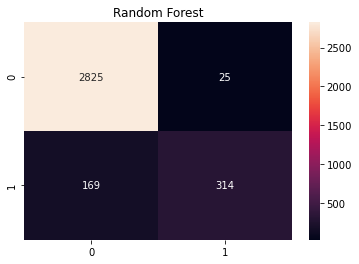

In [25]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

# Logistic Regression

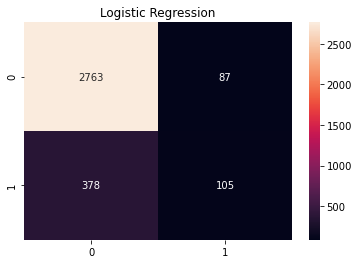

In [26]:
logistic_regression_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, logistic_regression))
sns.heatmap(logistic_regression_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

# Checking the score of each model 

In [27]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, logistic_regression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.92      0.74      0.82       483

    accuracy                           0.95      3333
   macro avg       0.94      0.87      0.90      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.89      0.51      0.65       483

    accuracy                           0.92      3333
   macro avg       0.90      0.75      0.80      3333
weighted avg       0.92      0.92      0.91      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2850
           1       0.91      0.66      0.76       483

    accuracy                           0.94      3333
   macro avg       0.93      0.82     

In [28]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

In [29]:
Xtrain[:5]

array([[ 1.21034697,  3.56476604,  1.71881732, -0.32758048, -0.61839626,
        -0.59175986, -1.54749005, -0.42039334, -1.54701199, -0.73522215,
        -1.86320226, -0.73631669,  1.25237586,  0.91447346,  1.25275137,
        -1.30302599,  0.61789834, -1.30640087,  0.33235445],
       [ 0.94049036,  0.1741805 , -0.52360328, -0.32758048, -0.61839626,
        -0.59175986, -1.24451104,  0.22746635, -1.24457234, -0.14357895,
         0.49627857, -0.14467223,  0.15876125, -0.36327453,  0.15850147,
        -2.19862729, -0.19483061, -2.19539646,  1.8529274 ],
       [ 1.14288282, -0.6546293 , -0.52360328,  3.05268496, -0.61839626,
        -0.59175986,  0.78269399, -1.11808839,  0.78285345,  2.48528903,
         0.54648029,  2.48640548,  0.14096282,  0.19893459,  0.14092316,
        -0.5507209 ,  1.83699177, -0.55009118, -0.42793202],
       [-1.42075497,  1.00299029, -0.52360328, -0.32758048, -0.61839626,
        -0.59175986, -0.97091181, -0.12138118, -0.97129652, -0.41376268,
        -1.913

In [30]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=42) #unconstrained model 
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [31]:
def printscores(actual,pred):
    print("AUC:",metrics.roc_auc_score(actual,pred))
    print("accuracy:",metrics.accuracy_score(actual,pred))
    print("recall  :",metrics.recall_score(actual,pred))
    print("precision :",metrics.precision_score(actual,pred))
    print("f1-score : ",metrics.f1_score(actual,pred))

In [32]:
trainp=model.predict(Xtrain)

In [33]:
testp=model.predict(Xtest)

In [34]:
printscores(ytrain,trainp)

AUC: 1.0
accuracy: 1.0
recall  : 1.0
precision : 1.0
f1-score :  1.0


In [35]:
printscores(ytest,testp)

AUC: 0.8546863520274289
accuracy: 0.9190404797601199
recall  : 0.7623762376237624
precision : 0.719626168224299
f1-score :  0.7403846153846154


In [36]:
model=tree.DecisionTreeClassifier(random_state=42)
scores=model_selection.cross_val_score(tree.DecisionTreeClassifier(random_state=42),Xtrain,ytrain,cv=4,scoring="recall")

In [37]:
np.mean(scores)

0.7094846491228071

In [38]:
np.std(scores)  ## need to calculkate to make sure scores are consistent

0.017684044501753014

In [39]:
scores

array([0.6875    , 0.70833333, 0.70526316, 0.73684211])

In [40]:
scores=model_selection.cross_val_score(linear_model.LogisticRegression(),Xtrain,ytrain,cv=4,scoring="recall")

In [41]:
scores

array([0.20833333, 0.23958333, 0.13684211, 0.2       ])

In [42]:
np.mean(scores)

0.19618969298245614

In [43]:
np.std(scores)

0.037306603408580614

In [44]:
model=tree.DecisionTreeClassifier(max_depth=4,random_state=42) #unconstrained model 
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [45]:
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d, cv=10 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14]},
             return_train_score=True, scoring='recall')

In [46]:
obj.best_params_

obj.best_score_

resultsdf=pd.DataFrame(obj.cv_results_)

{'max_depth': 14}

In [49]:
resultsdf[ ["params","mean_test_score","mean_train_score"] ]

,params,mean_test_score,mean_train_score
0,{'max_depth': 3},0.444602,0.460176
1,{'max_depth': 4},0.505263,0.568946
2,{'max_depth': 5},0.672874,0.732691
3,{'max_depth': 6},0.670378,0.773125
4,{'max_depth': 7},0.693792,0.795819
5,{'max_depth': 8},0.706815,0.842061
6,{'max_depth': 9},0.709447,0.861256
7,{'max_depth': 10},0.714575,0.872596
8,{'max_depth': 11},0.717274,0.890341
9,{'max_depth': 12},0.719973,0.902845


In [56]:
 maxdepthvalues=list(range(3,15)) 
 minsamplessplitvalues=list(range(30,61))
## create  python dictionary : key : hyper parameter name , value: list of all value u want to assign to hyperparameter
 d={"max_depth": maxdepthvalues    ,  "min_samples_split": minsamplessplitvalues}

 obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42)  ,  param_grid=d, cv=10 , scoring="recall")

 obj.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_split': [30, 31, 32, 33, 34, 35, 36, 37,
                                               38, 39, 40, 41, 42, 43, 44, 45,
                                               46, 47, 48, 49, 50, 51, 52, 53,
                                               54, 55, 56, 57, 58, 59, ...]},
             scoring='recall')

In [57]:
obj.best_params_

{'max_depth': 8, 'min_samples_split': 30}

In [58]:
obj.best_score_

0.6962887989203778